## Style transfer using tfhub
In this project I used a prebuilt model to merge the style of an image with the content of another image.

In [ ]:
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_hub as hub

loading the model that is going to be used in our project.

In [ ]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

### Pre-processing
Here we are preprocessing the image so that it can be used in the model.
**img_path** is used to locally cache the files, and **img** is used to load and convert the image to a float32 *numpy array*, *add batch dimension* and *normalize* the data between [0,1].


In [ ]:
def process_img(img_url, img_size=(256, 256), preserve_aspect_ratio=True):
  img_path = tf.keras.utils.get_file(os.path.basename(img_url)[-128:], img_url)
  img = tf.io.decode_image(
      tf.io.read_file(img_path),
      channels=3,
      dtype=tf.float32)[tf.newaxis, ...]
  img = tf.image.resize(img, img_size, preserve_aspect_ratio=True)
  return img

Here I am using an image url to pull the image and am using the preprocessing layer in the above cell on the image.

In [ ]:
content_img_url = 'https://animals.sandiegozoo.org/sites/default/files/2016-08/hero_zebra_animals.jpg'
style_img_url = 'https://tiqets-cdn.s3.eu-west-1.amazonaws.com/wordpress/blog/wp-content/uploads/2021/04/07092809/909px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg'
content_img_size = (400, 400)
style_img_size = (256, 256)
content_img = process_img(content_img_url, content_img_size)
style_img = process_img(style_img_url, style_img_size)

### Results

The below set of images shows the *content*, *style* and *stylized image*. For example i have used a picture of a zebra with one of Van Gogh's famous paintings to create a zebra image created in that style.

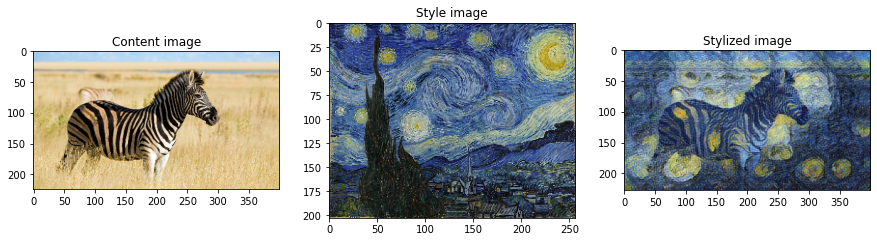

In [ ]:
outputs = hub_module(tf.constant(content_img), tf.constant(style_img))
stylized_img = tf.squeeze(outputs[0])
content = tf.squeeze(content_img)
style = tf.squeeze(style_img)
fig, ax = plt.subplots(ncols=3, figsize=(15, 15))
ax[0].imshow(content)
ax[0].set_title("Content image")
ax[1].imshow(style)
ax[1].set_title("Style image")
ax[2].imshow(stylized_img)
ax[2].set_title("Stylized image")
plt.show()